In [1]:
import cv2
import glob
import keras
import keras as k
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from numpy import loadtxt
from natsort import natsorted
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import Dense 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout 
from keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ReduceLROnPlateau

In [2]:
ytrain = pd.read_csv("train.csv")
ytrain = ytrain['label']
ytrain = np.asarray(ytrain)
ytrain.reshape((49000,1));

### Using natsorted to sort all the *.png files. 
### The images are of RGBA (A-alpha) format.
### Converted into Gray scale format to help with computations without any loss of data.
### Reshaping into size(examples, height, width, channels)

In [3]:
filelist1 = natsorted(glob.glob('Images/train/*.png'))         #Using natsorted to sort all the *.png files. 
xtrain = np.array([(np.array(Image.open(fname).convert('L'))/255.0) for fname in filelist1])
xtrain = xtrain.reshape(49000,28,28,1)                         #Reshaping into size(examples, height, width, channel)

In [4]:
filelist2 = natsorted(glob.glob('Images/test/*.png'))
xtest = np.array([(np.array(Image.open(fname).convert('L'))/255) for fname in filelist2])
xtest = xtest.reshape(21000,28,28,1)


In [5]:
ytrain = np.asarray(tf.one_hot(ytrain, 10, axis = -1))       #One-Hot encoding

In [6]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)

(49000, 28, 28, 1)
(49000, 10)
(21000, 28, 28, 1)


In [7]:
x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size=0.1, random_state=42)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(44100, 28, 28, 1)
(4900, 28, 28, 1)
(44100, 10)
(4900, 10)


### We will use the below defined function after making prediction from the trained model, to create the final submission file and visualising the model performance.

In [8]:
def submission_and_visualization(final_predictions, model_number, model_history):
    y = final_predictions.copy()
    y= np.argmax(y, axis = 1)
    y.reshape(21000,1);

    col1 = np.arange(49000,70000,1)
    col2 = y.copy()

    final = np.stack((col1, col2), axis = 1)
    finaldf = pd.DataFrame(data=final)
    finaldf.rename(columns = {0:'filename', 1:'label'} , inplace = True)

    name = []
    for i in finaldf['filename']:
        i = str(i)+".png"
        name.append(i)

    finaldf['filenames'] = name
    finaldf['filename']=finaldf['filenames']
    del finaldf['filenames']
    
    submission_file = "Solution"+str(model_number)+".csv"
    finaldf.to_csv(submission_file, index=False)

    plt.plot(model_history.history['loss'], label='Train loss')
    plt.plot(model_history.history['val_loss'], label='Validation loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Graph")
    plt.legend()
    plt.show()
    plt.plot(model_history.history['accuracy'], label = 'Train accuracy')
    plt.plot(model_history.history['val_accuracy'], label = 'Validation accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Graph")
    plt.legend()
    plt.show()
    
    return 

# CNN Models :

## Model 1 - Basic model without data augmentation, dropout, batch normalisation etc. 

In [9]:
model1 = Sequential()
model1.add(Conv2D(16, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform'))
model1.add(MaxPooling2D((2,2)))
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model1.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'))
model1.add(Dense(10, activation = 'softmax'))
model1.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history1 = []                  #Using callback to store history of accuracies and losses through and with which model proggresses. 
history1 = model1.fit(x_train, y_train, batch_size=32, epochs = 20, validation_data=(x_val, y_val),  callbacks=[history1]) 

Epoch 1/20
1379/1379 [==============================] - 6s 4ms/step - loss: 0.1809 - accuracy: 0.9446 - val_loss: 0.0738 - val_accuracy: 0.9761
Epoch 2/20
1379/1379 [==============================] - 5s 4ms/step - loss: 0.0581 - accuracy: 0.9815 - val_loss: 0.0539 - val_accuracy: 0.9851
Epoch 3/20
1379/1379 [==============================] - 5s 4ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0597 - val_accuracy: 0.9833
Epoch 4/20
1379/1379 [==============================] - 5s 4ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0599 - val_accuracy: 0.9818
Epoch 5/20
1379/1379 [==============================] - 5s 4ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0632 - val_accuracy: 0.9835
Epoch 6/20
1379/1379 [==============================] - 6s 4ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0471 - val_accuracy: 0.9886
Epoch 7/20
1379/1379 [==============================] - 5s 4ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0620 - val_accuracy:

In [11]:
ytest1 = model1.predict(xtest)

## Visualisation of train and developer sets' performance on Model 1 for each epoch.

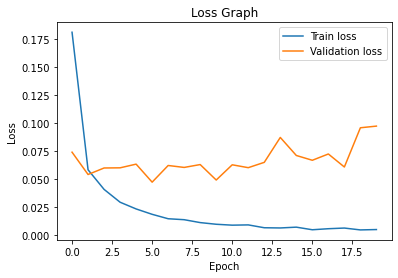

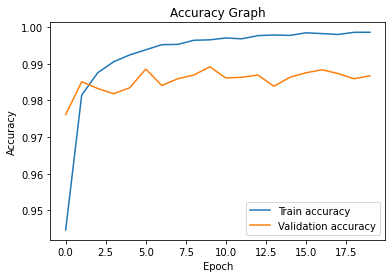

In [12]:
submission_and_visualization(ytest1, 1, history1)

## Model 2 - Deeper model with Batch Normalisation. 

In [13]:
model2 = Sequential()
model2.add(Conv2D(16, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
model2.add(MaxPooling2D((2,2)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform'))
model2.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same' , kernel_initializer = 'he_uniform'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model2.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'))
model2.add(Dense(10, activation = 'softmax'))
opt = Adam(learning_rate= 0.001)
model2.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history2 = []
history2 = model2.fit(x_train, y_train, batch_size=32, epochs = 20, validation_data=(x_val, y_val),  callbacks=[history2])

Epoch 1/20
1379/1379 [==============================] - 9s 6ms/step - loss: 0.1390 - accuracy: 0.9592 - val_loss: 0.0660 - val_accuracy: 0.9786
Epoch 2/20
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0579 - val_accuracy: 0.9835
Epoch 3/20
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0604 - val_accuracy: 0.9855
Epoch 4/20
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0569 - val_accuracy: 0.9853
Epoch 5/20
1379/1379 [==============================] - 9s 6ms/step - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.0521 - val_accuracy: 0.9871
Epoch 6/20
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0227 - accuracy: 0.9936 - val_loss: 0.0720 - val_accuracy: 0.9843
Epoch 7/20
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0524 - val_accuracy:

In [15]:
ytest2 = model2.predict(xtest)

## Visualisation of train and developer sets' performance on Model 2 for each epoch.

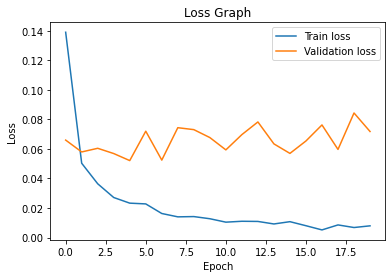

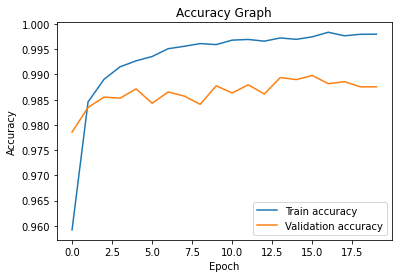

In [16]:
submission_and_visualization(ytest2, 2, history2)

## Model 3 - Deeper model with Batch Normalisation, Dropout and Adam optimizer.
### Since this was the most promising, it was trained for 50 epochs.

In [17]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model3.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Flatten())
model3.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history3 = []
history3 = model3.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_data=(x_val, y_val),  callbacks=[history3])

Epoch 1/50
1379/1379 [==============================] - 8s 6ms/step - loss: 0.1170 - accuracy: 0.9645 - val_loss: 0.0710 - val_accuracy: 0.9788
Epoch 2/50
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.0623 - val_accuracy: 0.9782
Epoch 3/50
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0521 - val_accuracy: 0.9847
Epoch 4/50
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0609 - val_accuracy: 0.9824
Epoch 5/50
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0419 - val_accuracy: 0.9876
Epoch 6/50
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0456 - val_accuracy: 0.9878
Epoch 7/50
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0407 - val_accuracy:

In [19]:
ytest3 = model3.predict(xtest)

## Visualisation of train and developer sets' performance on Model 3 for each epoch.

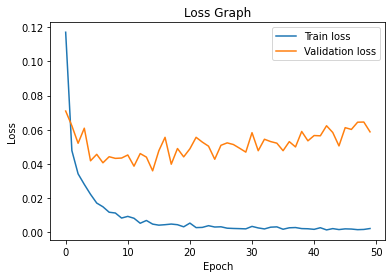

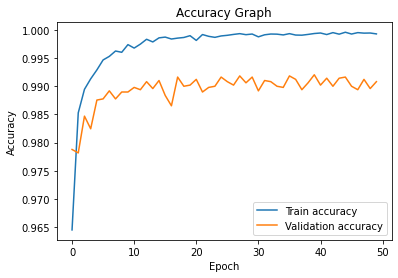

In [20]:
submission_and_visualization(ytest3, 3, history3)

## LeNet50 - Model using LeNet50 architecture, without any changes.

In [21]:
model4 = Sequential()
model4.add(Conv2D(6, (5,5), activation = 'tanh', input_shape = (28,28,1), padding = 'same'))
model4.add(AveragePooling2D())
model4.add(Conv2D(16, (5,5), activation = 'tanh', padding = 'valid'))
model4.add(AveragePooling2D())
model4.add(Flatten())
model4.add(Dense(120, activation = 'tanh'))
model4.add(Dense(84, activation = 'tanh'))
model4.add(Dense(10, activation = 'sigmoid'))
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [22]:
history4 = []
history4 = model4.fit(x_train, y_train, batch_size = 32, epochs = 25, validation_data=(x_val, y_val),  callbacks=[history4])

Epoch 1/25
1379/1379 [==============================] - 6s 4ms/step - loss: 0.2901 - accuracy: 0.9221 - val_loss: 0.1434 - val_accuracy: 0.9592
Epoch 2/25
1379/1379 [==============================] - 6s 4ms/step - loss: 0.0997 - accuracy: 0.9700 - val_loss: 0.0931 - val_accuracy: 0.9712
Epoch 3/25
1379/1379 [==============================] - 6s 4ms/step - loss: 0.0662 - accuracy: 0.9800 - val_loss: 0.0844 - val_accuracy: 0.9759
Epoch 4/25
1379/1379 [==============================] - 6s 4ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.0724 - val_accuracy: 0.9780
Epoch 5/25
1379/1379 [==============================] - 6s 4ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0695 - val_accuracy: 0.9806
Epoch 6/25
1379/1379 [==============================] - 6s 4ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0657 - val_accuracy: 0.9810
Epoch 7/25
1379/1379 [==============================] - 6s 4ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0650 - val_accuracy:

In [23]:
ytest4 = model4.predict(xtest)

## Visualisation of train and developer sets' performance on Model 4 for each epoch.

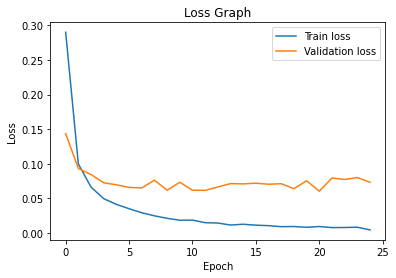

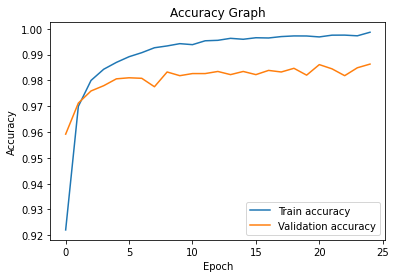

In [24]:
submission_and_visualization(ytest4, 4, history4)

## Transfer learning using ResNet50

### To use ResNet50 we need to do some preprocessing on the datasets again because
### 1. The network can take the input image having height and width as multiples of 32.
### 2. The network takes 3 as channel width.

In [25]:
train_examples = xtrain.shape[0]        #Number of training examples
test_examples = xtest.shape[0]          #Number of test examples 

ResTrain = np.zeros((train_examples, 32,32,3))          
ResTest = np.zeros((test_examples, 32,32,3))

for example in range(train_examples):
    ResTrain[example,:28,:28,0] = xtrain[example, :].reshape(28,28)
    ResTrain[example,:28,:28,1] = xtrain[example, :].reshape(28,28)
    ResTrain[example,:28,:28,2] = xtrain[example, :].reshape(28,28)

for example in range(test_examples):
    ResTest[example,:28,:28,0] = xtest[example, :].reshape(28,28)
    ResTest[example,:28,:28,1] = xtest[example, :].reshape(28,28)
    ResTest[example,:28,:28,2] = xtest[example, :].reshape(28,28)

In [26]:
for example in range(train_examples):
    ResTrain[example] = cv2.resize(ResTrain[example], (32, 32))
    
for example in range(test_examples):
    ResTest[example] = cv2.resize(ResTest[example], (32, 32))

In [27]:
print("Shape of train input images : ", ResTrain.shape)
print("Shape of test input images : ", ResTest.shape)
print("Shape of train labels : ", ytrain.shape)
print("We have processed the input data to be fed into ResNet50.")

Shape of train input images :  (49000, 32, 32, 3)
Shape of test input images :  (21000, 32, 32, 3)
Shape of train labels :  (49000, 10)
We have processed the input data to be fed into ResNet50.


### Data Augmentation :

In [28]:
train_datagen = ImageDataGenerator(width_shift_range=.2, height_shift_range=.2,
                                   shear_range=.2, rotation_range=20, zoom_range=.1)
                                   
validation_datagen = ImageDataGenerator()

### Loading ResNet50 model with weights trained on ImageNet data, as a base model.

In [29]:
base_model = ResNet50(weights='imagenet', input_shape=(32,32,3),include_top=False)

## Model 5 is a model built on top of ResNet50, **where all the layers are trained.** 

In [30]:
#Appeding layers to the base model(ResNet50)
model5 = Sequential()
model5.add(base_model)
model5.add(Flatten())
model5.add(Dense(units=60, activation='relu'))
model5.add(Dense(units=10, activation='softmax'))

In [31]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 60)                122940    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                610       
Total params: 23,711,262
Trainable params: 23,658,142
Non-trainable params: 53,120
_________________________________________________________________


In [32]:
model5.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
train_images, val_images, train_labels, val_labels = train_test_split(ResTrain, ytrain, test_size=0.1, shuffle=True, random_state=42)
test_images = ResTest

In [34]:
batch_size = 212
history5 = []
history5 = model5.fit(train_datagen.flow(train_images,train_labels, batch_size=batch_size),
                         steps_per_epoch=train_images.shape[0] / batch_size, 
                         epochs=5,    
                         validation_data=validation_datagen.flow(val_images,val_labels,
                                                                 batch_size=batch_size),
                         validation_steps=val_images.shape[0] / batch_size,
                         callbacks=[history5])

Epoch 1/5
209/208 [==============================] - 55s 263ms/step - loss: 0.3196 - accuracy: 0.9066 - val_loss: 44.0482 - val_accuracy: 0.0978
Epoch 2/5
209/208 [==============================] - 61s 293ms/step - loss: 0.1722 - accuracy: 0.9517 - val_loss: 4.1822 - val_accuracy: 0.1390
Epoch 3/5
209/208 [==============================] - 64s 308ms/step - loss: 0.0969 - accuracy: 0.9721 - val_loss: 1.3018 - val_accuracy: 0.5708
Epoch 4/5
209/208 [==============================] - 66s 314ms/step - loss: 0.1557 - accuracy: 0.9550 - val_loss: 0.7778 - val_accuracy: 0.7347
Epoch 5/5
209/208 [==============================] - 67s 318ms/step - loss: 0.0885 - accuracy: 0.9742 - val_loss: 2.7737 - val_accuracy: 0.6604


In [35]:
ytest5 = model5.predict(ResTest)

## Visualisation of train and developer sets' performance on Model 5 for each epoch.

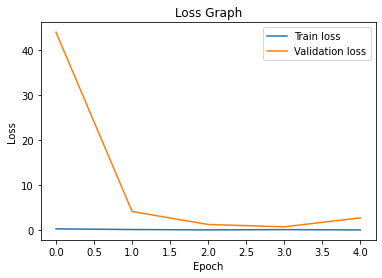

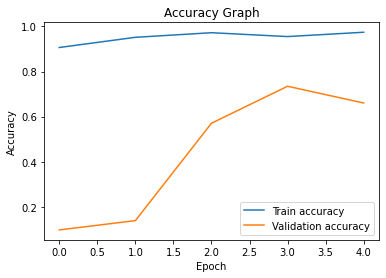

In [36]:
submission_and_visualization(ytest5, 5, history5)

In [37]:
model5.save("model5.h5")

## Model 6 is a model built on top of ResNet50, where selected layers, at the end of the network architecture are trained. 

In [38]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3))
x = base_model.output
x = Flatten()(x)
x = Dense(units=60, activation='relu')(x)
pred = Dense(units=10, activation='softmax')(x)

model6 = Model(inputs=base_model.input, outputs=pred)

model6.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics=['accuracy'])

for layer in base_model.layers:
    layer.trainable = False

In [39]:
history6 = []
history6 = model6.fit(train_datagen.flow(train_images,train_labels, batch_size=batch_size),
                         steps_per_epoch=train_images.shape[0] / batch_size, 
                         epochs=5,    
                         validation_data=validation_datagen.flow(val_images,val_labels,
                                                                 batch_size=batch_size),
                         validation_steps=val_images.shape[0] / batch_size,
                         callbacks=[history6])

Epoch 1/5
209/208 [==============================] - 65s 311ms/step - loss: 0.4198 - accuracy: 0.8914 - val_loss: 3224.8850 - val_accuracy: 0.1133
Epoch 2/5
209/208 [==============================] - 70s 335ms/step - loss: 0.1445 - accuracy: 0.9632 - val_loss: 13.2747 - val_accuracy: 0.1137
Epoch 3/5
209/208 [==============================] - 70s 335ms/step - loss: 0.1281 - accuracy: 0.9714 - val_loss: 1.9104 - val_accuracy: 0.6010
Epoch 4/5
209/208 [==============================] - 71s 342ms/step - loss: 0.1303 - accuracy: 0.9759 - val_loss: 0.6036 - val_accuracy: 0.8090
Epoch 5/5
209/208 [==============================] - 71s 339ms/step - loss: 0.1074 - accuracy: 0.9762 - val_loss: 0.6813 - val_accuracy: 0.9239


In [40]:
for layer in base_model.layers[0:143]:
    layer.trainable = False
    
for layer in base_model.layers[143:]:
    layer.trainable = True

In [41]:
history6 = []
history6 = model6.fit(train_datagen.flow(train_images,train_labels, batch_size=batch_size),
                         steps_per_epoch=train_images.shape[0] / batch_size, 
                         epochs=10,    
                         validation_data=validation_datagen.flow(val_images,val_labels,
                                                                 batch_size=batch_size),
                         validation_steps=val_images.shape[0] / batch_size,
                         callbacks=[history6]) 

Epoch 1/10
209/208 [==============================] - 69s 329ms/step - loss: 0.0867 - accuracy: 0.9784 - val_loss: 8.8802 - val_accuracy: 0.9057
Epoch 2/10
209/208 [==============================] - 71s 337ms/step - loss: 0.0733 - accuracy: 0.9826 - val_loss: 0.1133 - val_accuracy: 0.9771
Epoch 3/10
209/208 [==============================] - 72s 342ms/step - loss: 0.0923 - accuracy: 0.9813 - val_loss: 0.0676 - val_accuracy: 0.9839
Epoch 4/10
209/208 [==============================] - 71s 342ms/step - loss: 0.0683 - accuracy: 0.9828 - val_loss: 0.3711 - val_accuracy: 0.9718
Epoch 5/10
209/208 [==============================] - 72s 345ms/step - loss: 0.0674 - accuracy: 0.9843 - val_loss: 0.1648 - val_accuracy: 0.9788
Epoch 6/10
209/208 [==============================] - 63s 302ms/step - loss: 0.0629 - accuracy: 0.9846 - val_loss: 31.1473 - val_accuracy: 0.7484
Epoch 7/10
209/208 [==============================] - 67s 322ms/step - loss: 0.0915 - accuracy: 0.9851 - val_loss: 0.1467 - val_a

In [42]:
ytest6 = model6.predict(ResTest)

## Visualisation of train and developer sets' performance on Model 6 for each epoch.

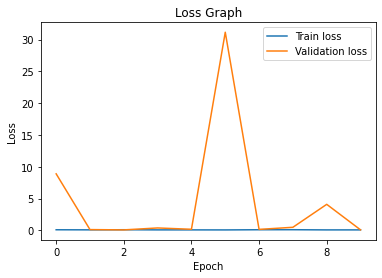

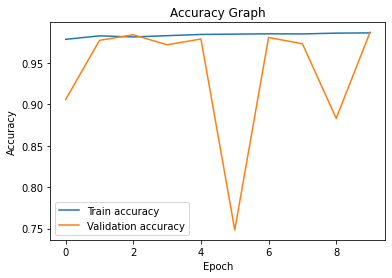

In [43]:
submission_and_visualization(ytest6, 6, history6)

In [44]:
model6.save("model6.h5")

## Model 7 - Final model giving the best results!
## 

In [45]:
model = Sequential()
model.add(Conv2D(32, (4, 4), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
      
model.add(Conv2D(128, (3, 3)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
       
model.add(Conv2D(128, (2, 2), activation = 'relu'))
model.add(Conv2D(256, (2, 2)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
        
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

opt = Adam(lr = 0.002)
model.compile(optimizer = opt, loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [46]:
train_gen = ImageDataGenerator(rotation_range=.15, horizontal_flip=False, vertical_flip=False, 
                              shear_range=.1, width_shift_range=.1, height_shift_range=.1, zoom_range=.1)
val_gen = ImageDataGenerator()

train_img_gen = train_gen.flow(x_train, y_train, batch_size=32)
val_img_gen = val_gen.flow(x_val, y_val, batch_size=32)

In [47]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3, verbose = 1, factor = 0.4, min_lr = 0.00002,
                                            mode = 'auto', cooldown = 0)

In [48]:
history = model.fit(train_img_gen, epochs = 75, validation_data=val_img_gen, verbose=1, callbacks=[reduce_lr])

Epoch 1/75
1379/1379 [==============================] - 18s 13ms/step - loss: 0.2661 - accuracy: 0.9211 - val_loss: 0.1172 - val_accuracy: 0.9678
Epoch 2/75
1379/1379 [==============================] - 17s 13ms/step - loss: 0.1248 - accuracy: 0.9660 - val_loss: 0.0952 - val_accuracy: 0.9735
Epoch 3/75
1379/1379 [==============================] - 17s 13ms/step - loss: 0.1063 - accuracy: 0.9715 - val_loss: 0.0693 - val_accuracy: 0.9824
Epoch 4/75
1379/1379 [==============================] - 19s 14ms/step - loss: 0.0954 - accuracy: 0.9741 - val_loss: 0.0693 - val_accuracy: 0.9816
Epoch 5/75
1379/1379 [==============================] - 19s 14ms/step - loss: 0.0844 - accuracy: 0.9779 - val_loss: 0.0616 - val_accuracy: 0.9831
Epoch 6/75
1379/1379 [==============================] - 22s 16ms/step - loss: 0.0782 - accuracy: 0.9792 - val_loss: 0.0508 - val_accuracy: 0.9863
Epoch 7/75
1379/1379 [==============================] - 22s 16ms/step - loss: 0.0698 - accuracy: 0.9824 - val_loss: 0.0445 -

In [49]:
ytest = model.predict(xtest)

## Visualisation of train and developer sets' performance on Model 7 for each epoch.

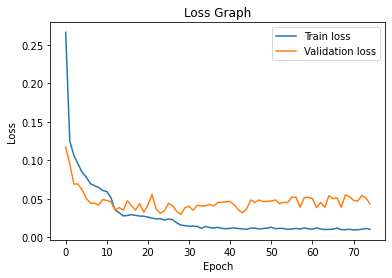

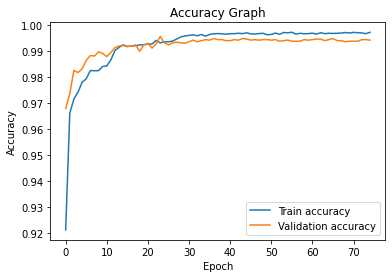

In [50]:
submission_and_visualization(ytest, 0, history)

In [51]:
model.save("model.h5")